In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image_dim=32 #give the image a dimension&it's const. 32 or 64

In [0]:
def parse_function(filenames): #bta5od el filename w btrg3ly el sora 
    #print(filename.label) 
    image_string=tf.read_file(filenames)
    
    #don't use tf.image.decode_image, or output shape will not be defined
    image=tf.image.decode_png(image_string,channels=3 )#for RGB #watchout for the comment
    
    #this will convert to float vals. in [0,1]
    image=tf.image.convert_image_dtype(image,tf.float32)
    
    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image #,label

In [0]:
def train_preprocess(image): #shwyt 3mlyat btt3ml 3la el sora 3shan el training
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=32.0/255.0) #why?
    image = tf.image.random_saturation(image, lower=0.5,upper=1.5)
    
    #Make sure the image is still in [0,1]
    image=tf.clip_by_value(image, 0.0, 1.0)
    
    return image #,label
#shift+enter

In [0]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)
    iterator = dataset.make_one_shot_iterator()
    return iterator
#shift+enter

In [0]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator =read_data(filenames)
    next_element = iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
    return X
#shift+enter

In [0]:
#import tensorflow as tf #we've already done that before so it's optional :)
filenames=['zero_1.jpg','zero_2.jpg','zero_3.jpg','zero_4.jpg','zero_5.jpg','zero_6.jpg','zero_7.jpg','zero_8.jpg','zero_9.jpg','zero_10.jpg',
          'one_1.jpg','one_2.jpg','one_3.jpg','one_4.jpg','one_5.jpg','one_6.jpg','one_7.jpg','one_8.jpg','one_9.jpg','one_10.jpg',
          'two_1.jpg','two_2.jpg','two_3.jpg','two_4.jpg','two_5.jpg','two_6.jpg','two_7.jpg','two_8.jpg','two_9.jpg','two_10.jpg',
          'three_1.jpg','three_2.jpg','three_3.jpg','three_4.jpg','three_5.jpg','three_6.jpg','three_7.jpg','three_8.jpg','three_9.jpg','three_10.jpg',
          'four_1.jpg','four_2.jpg','four_3.jpg','four_4.jpg','four_5.jpg','four_6.jpg','four_7.jpg','four_8.jpg','four_9.jpg','four_10.jpg',
          'five_1.jpg','five_2.jpg','five_3.jpg','five_4.jpg','five_5.jpg','five_6.jpg','five_7.jpg','five_8.jpg','five_9.jpg','five_10.jpg',
          'six_1.jpg','six_2.jpg','six_3.jpg','six_4.jpg','six_5.jpg','six_6.jpg','six_7.jpg','six_8.jpg','six_9.jpg','six_10.jpg',
          'seven_1.jpg','seven_2.jpg','seven_3.jpg','seven_4.jpg','seven_5.jpg','seven_6.jpg','seven_7.jpg','seven_8.jpg','seven_9.jpg','seven_10.jpg',
          'eight_1.jpg','eight_2.jpg','eight_3.jpg','eight_4.jpg','eight_5.jpg','eight_6.jpg','eight_7.jpg','eight_8.jpg','eight_9.jpg','eight_10.jpg',
          'nine_1.jpg','nine_2.jpg','nine_3.jpg','nine_4.jpg','nine_5.jpg','nine_6.jpg','nine_7.jpg','nine_8.jpg','nine_9.jpg','nine_10.jpg']#enter filenames of imgs
Y=np.array([0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,
            2,2,2,2,2,2,2,2,2,2,
            3,3,3,3,3,3,3,3,3,3,
            4,4,4,4,4,4,4,4,4,4,
            5,5,5,5,5,5,5,5,5,5,
            6,6,6,6,6,6,6,6,6,6,
            7,7,7,7,7,7,7,7,7,7,
            8,8,8,8,8,8,8,8,8,8,
            9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), #btrg3haly msfofa f bo3d wa7d
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.7), #optional h5tr3 rqm random msln 0.7 w ana mdelo rqm w yrg3 yshof yqarn bl rqm elly mdeholo lw tl3 2kbr mno yrg3 blneuron w lw 2s8r hyrg3 b zero
    tf.keras.layers.Dense(100,activation=tf.nn.softmax) #number of classes,act func of classification
])

model.compile(optimizer='adam' 
              ,loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(X, Y, epochs=10000,batch_size=102) #between 1000 & 10000
                              
model.summary()                              

model.evaluate(X,Y)

Epoch 1/1000
100/100 [==============================] - 1s 14ms/step - loss: 4.8210 - acc: 0.0100
Epoch 2/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.2115 - acc: 0.0200
Epoch 3/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.2866 - acc: 0.0300
Epoch 4/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.2730 - acc: 0.0200
Epoch 5/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.0133 - acc: 0.0300
Epoch 6/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.6256 - acc: 0.0200
Epoch 7/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.4604 - acc: 0.0200
Epoch 8/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.4251 - acc: 0.0200
Epoch 9/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.2266 - acc: 0.0200
Epoch 10/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.9843 - acc: 0.0200
Epoch 11/1000
100/100 [=====

[0.003545674728229642, 1.0]

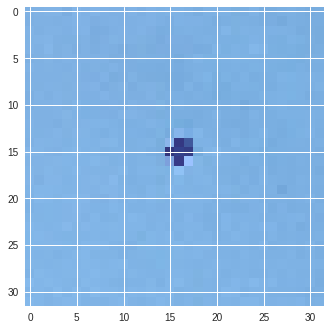

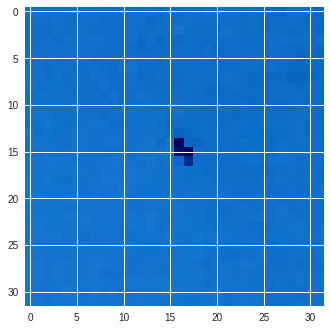

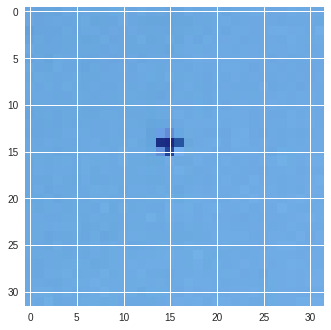

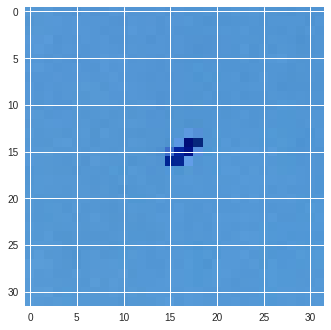

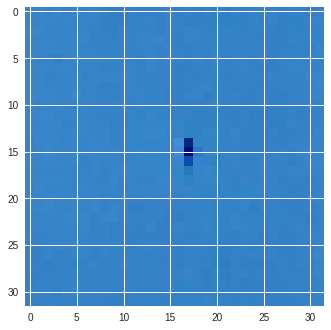

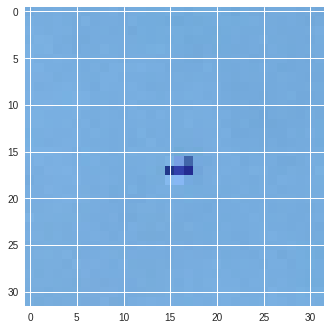

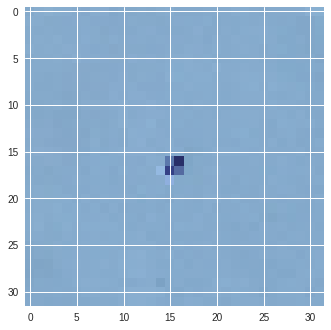

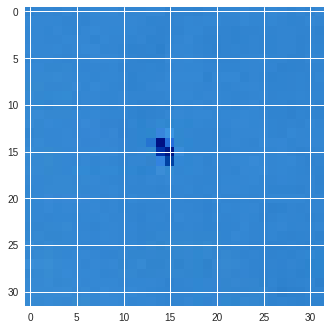

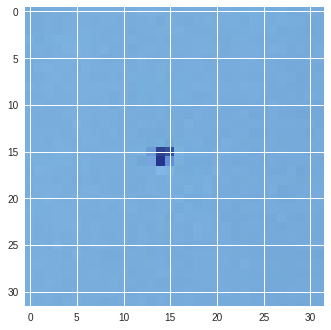

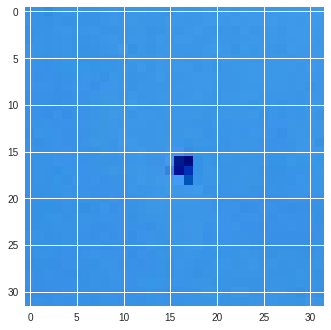

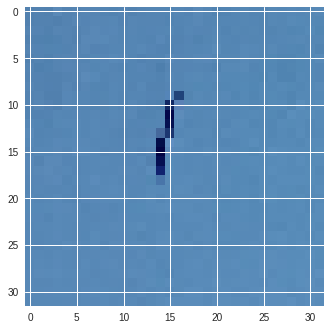

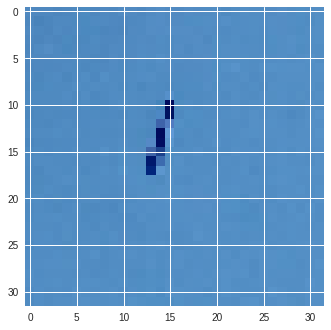

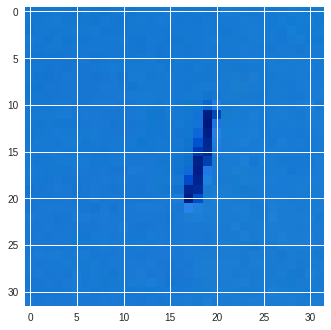

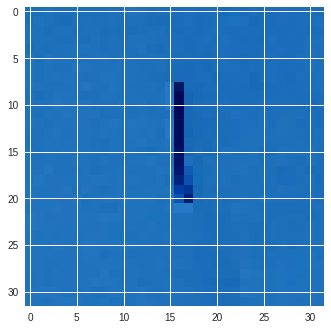

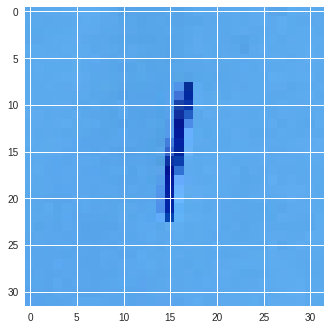

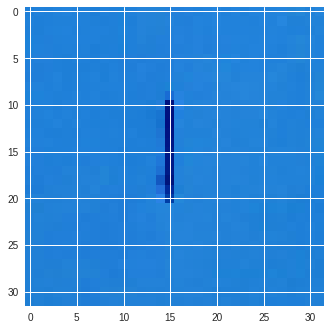

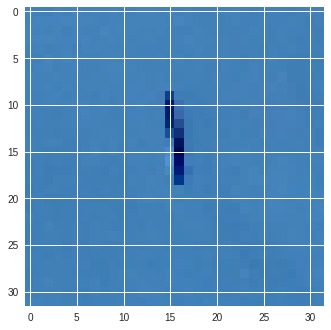

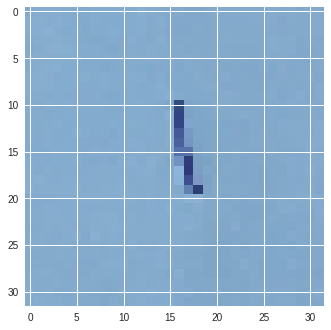

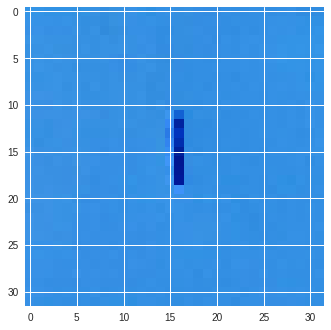

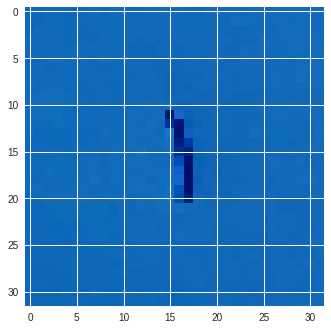

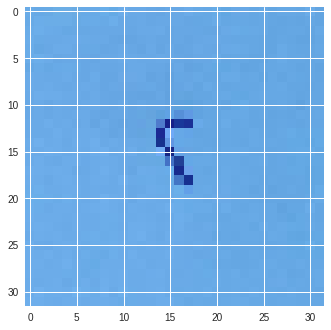

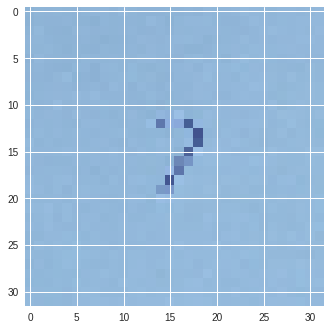

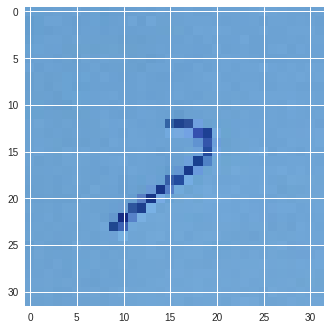

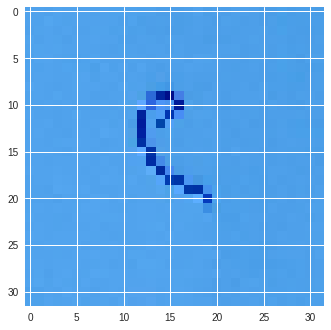

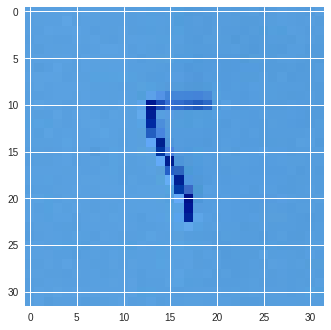

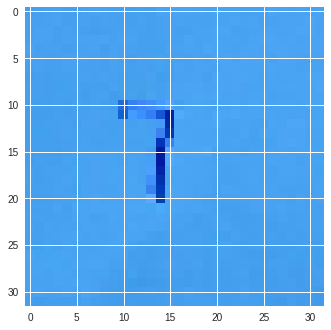

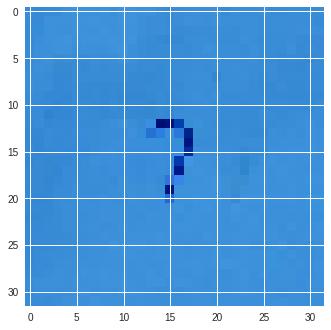

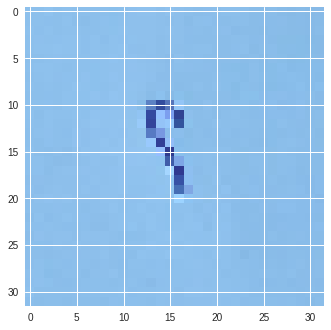

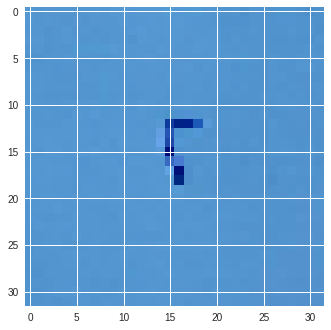

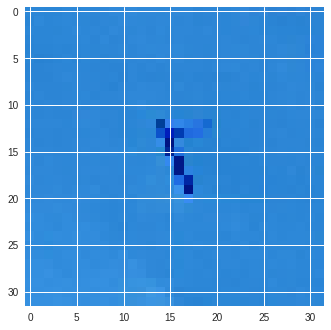

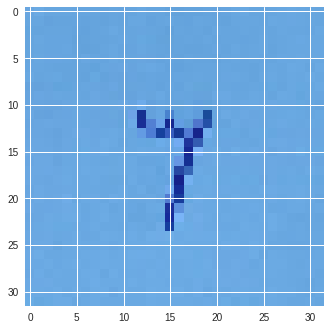

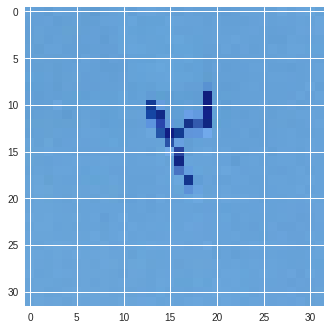

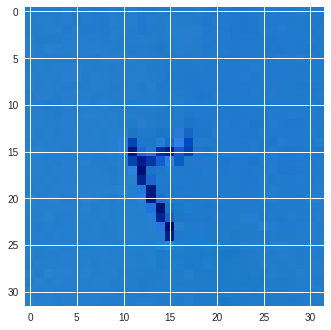

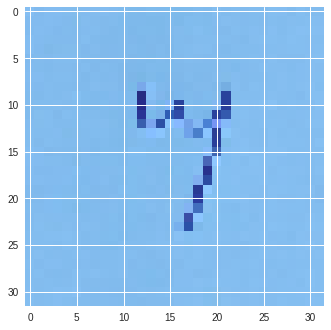

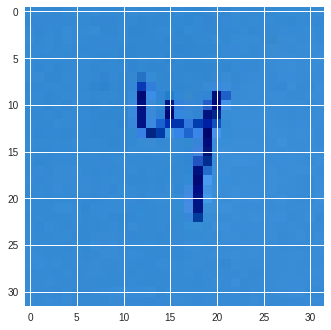

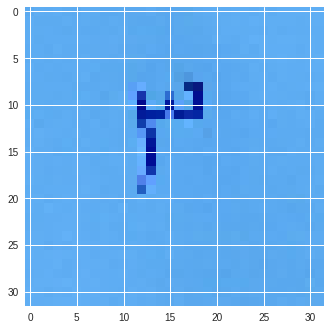

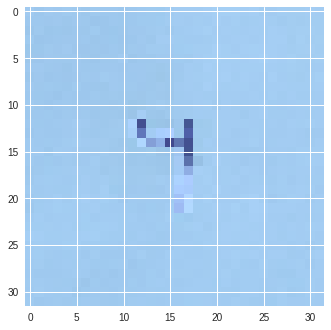

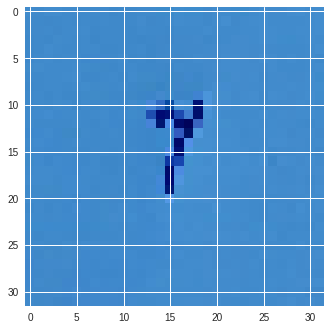

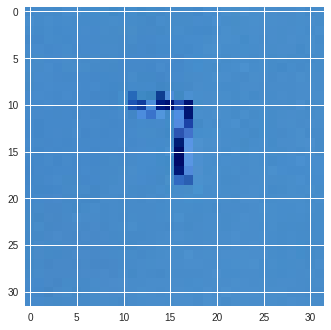

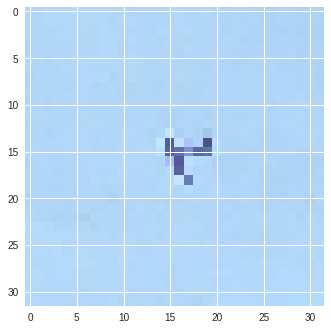

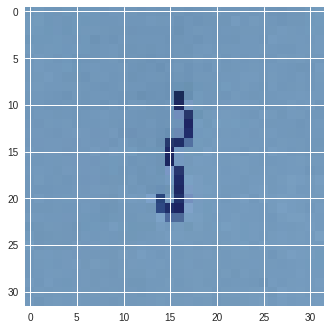

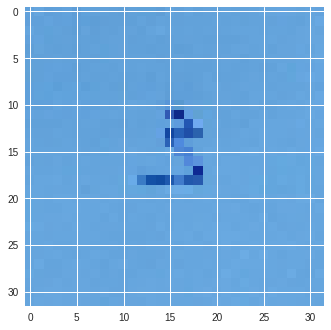

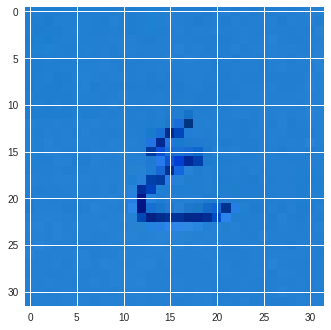

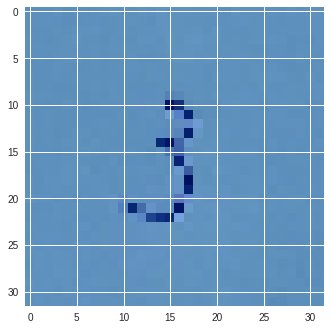

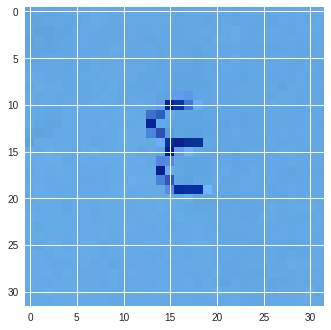

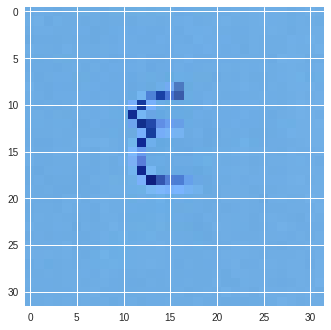

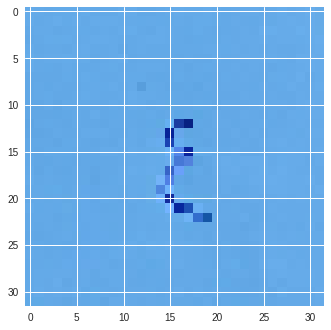

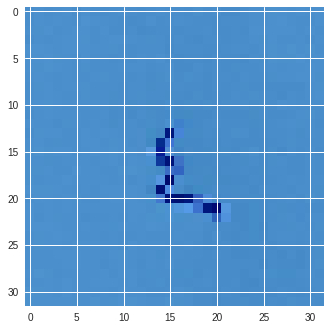

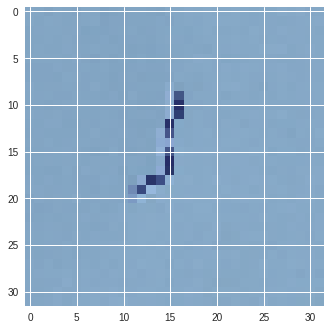

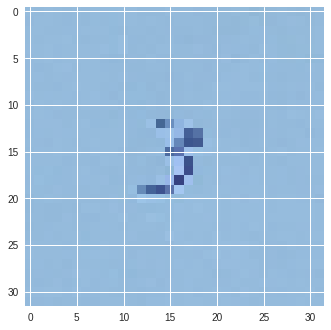

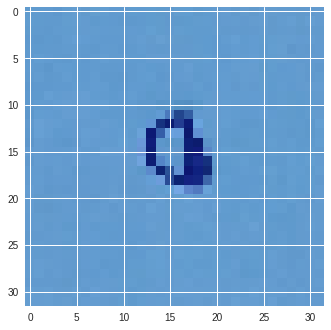

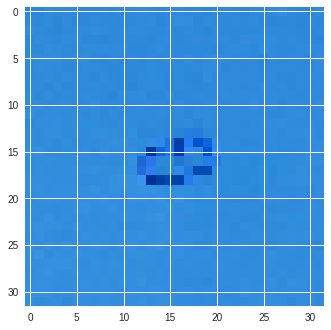

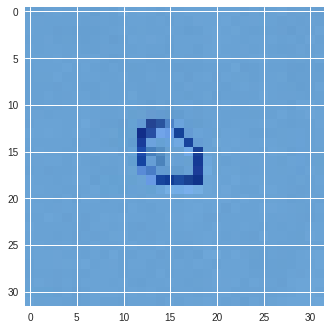

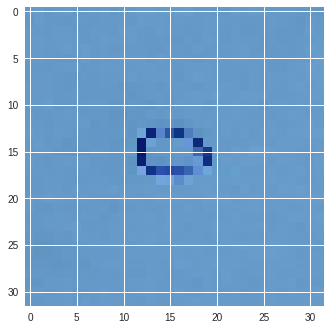

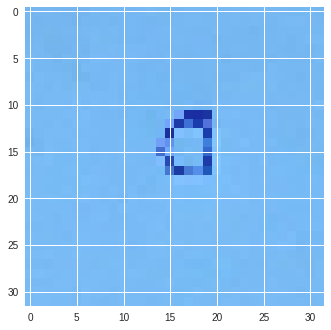

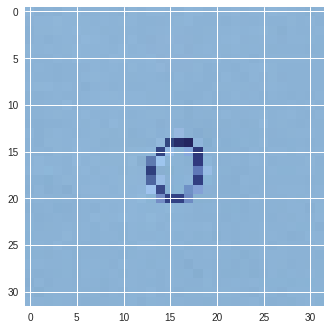

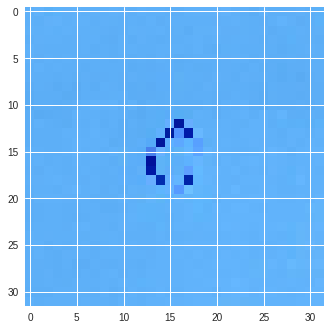

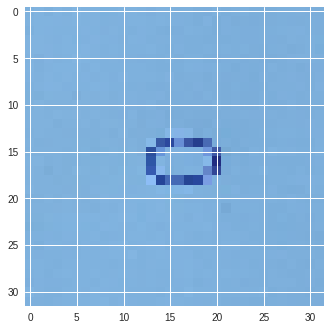

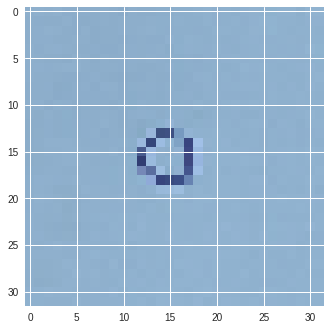

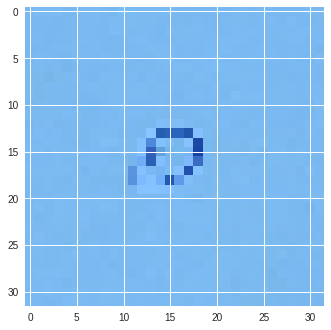

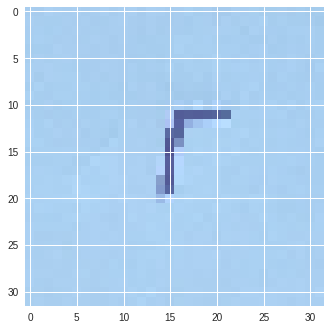

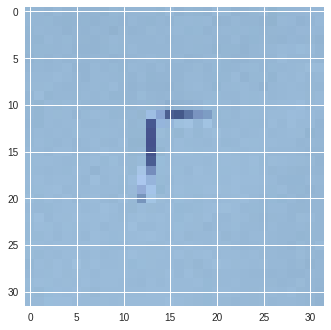

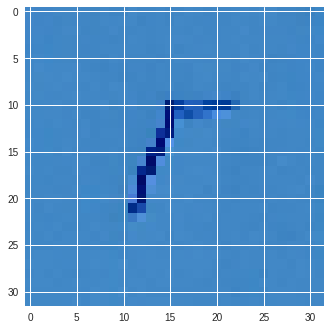

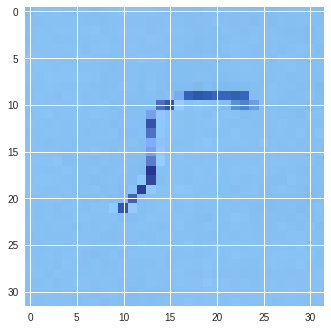

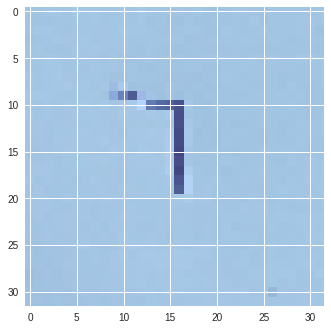

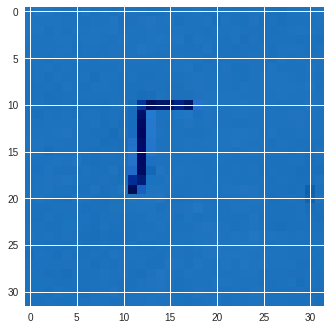

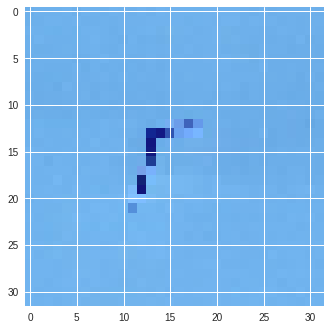

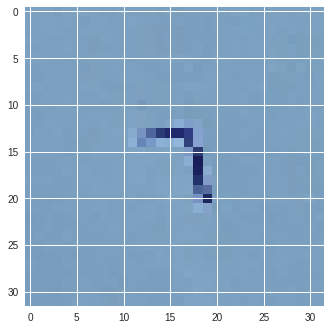

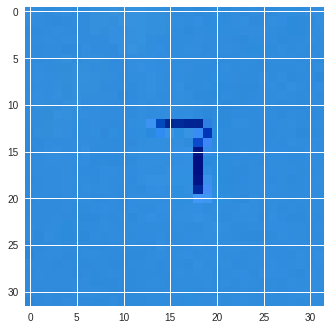

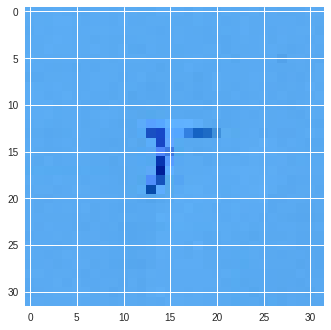

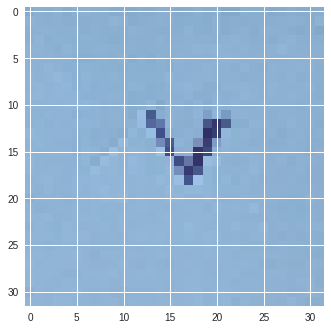

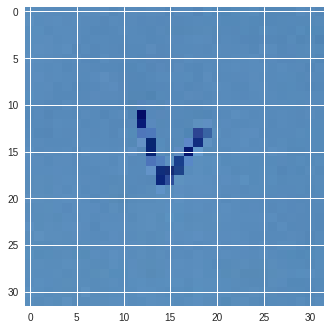

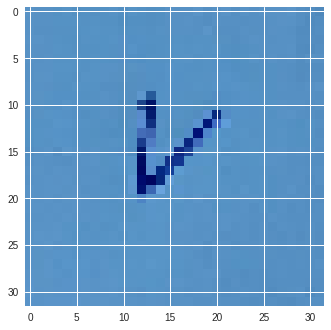

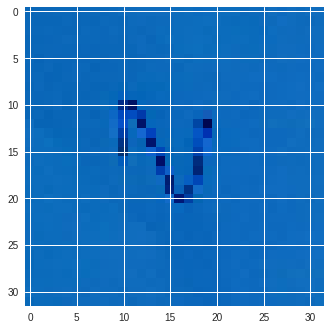

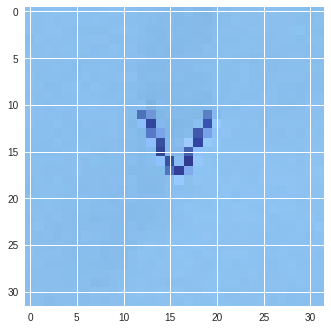

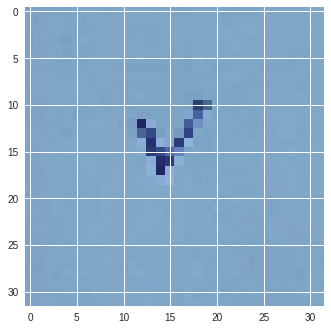

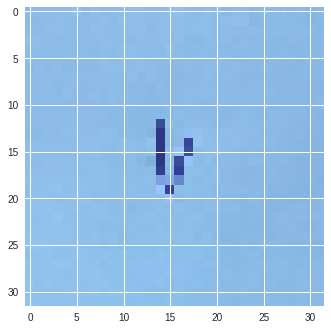

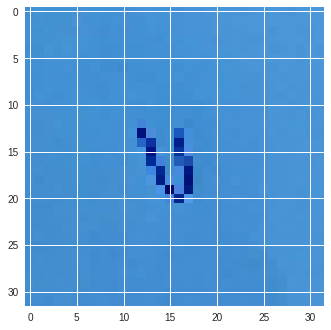

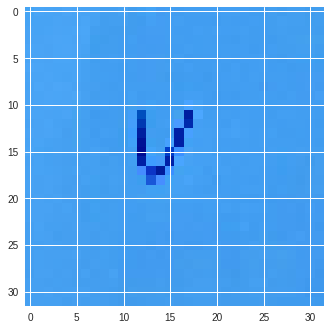

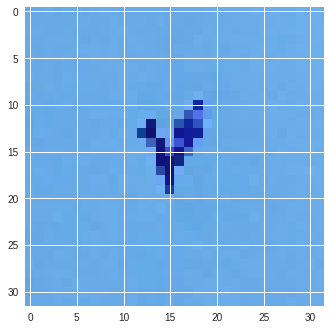

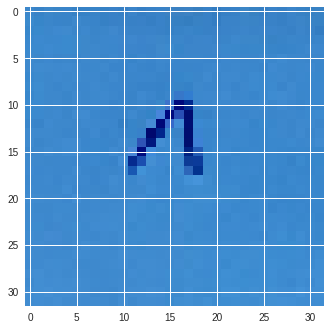

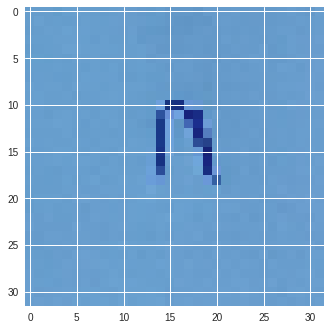

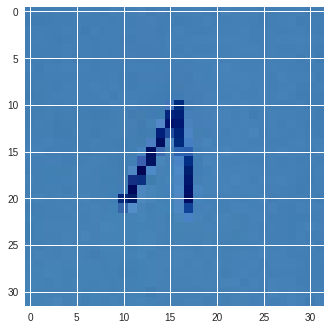

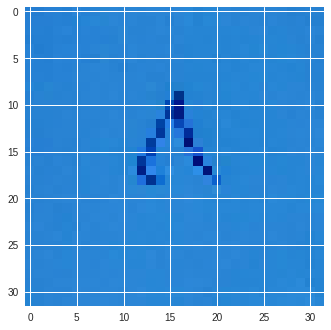

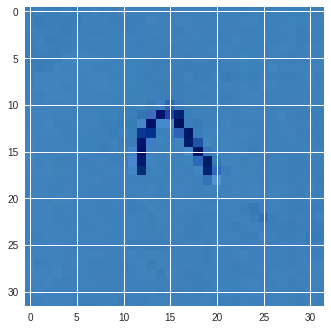

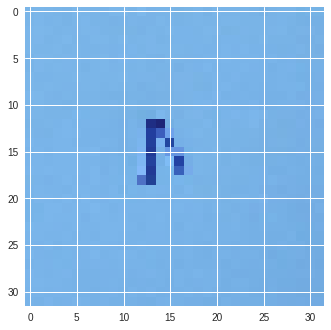

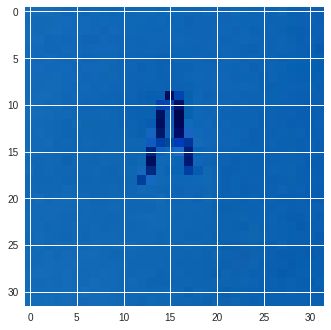

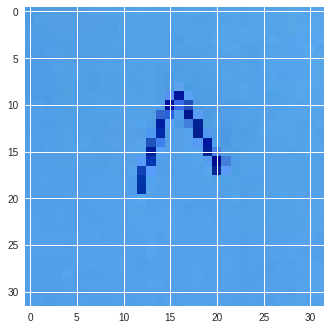

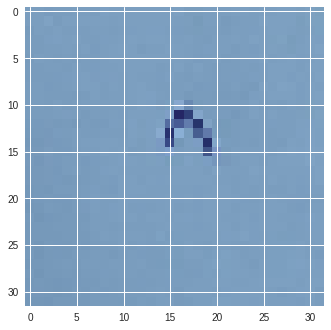

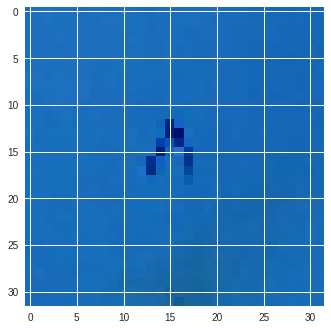

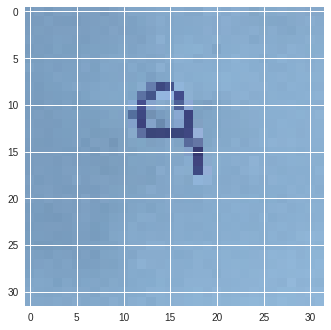

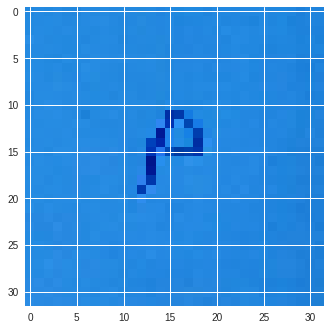

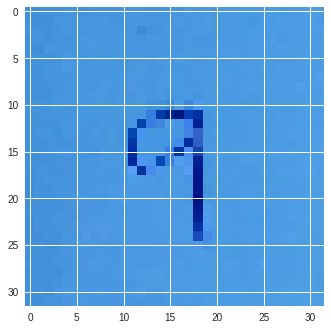

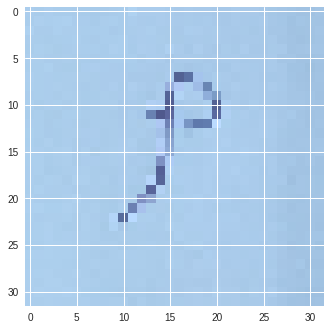

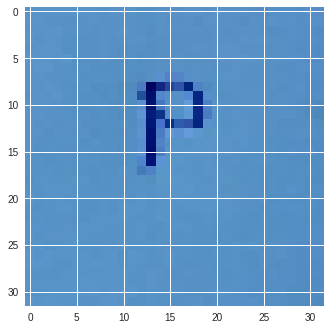

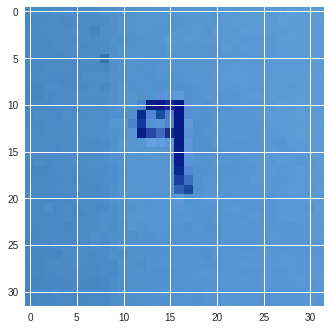

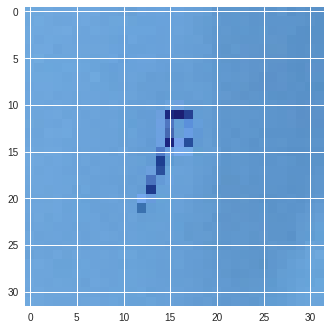

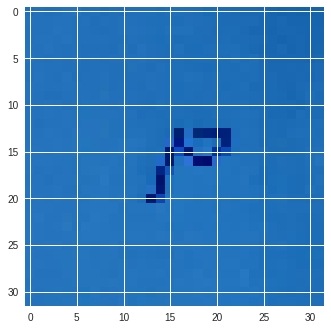

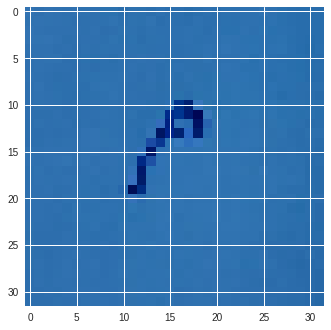

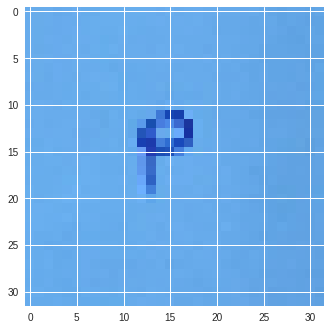

In [0]:
for i in range(len(X)):
  plt.imshow(X[i])
  plt.show()